In [2]:
import pyvista as pv
import numpy as np
import os, flopy
import matplotlib.pyplot as plt
name = 'Model'
workspace = '../model'
mf_exe_name = '../exe/mf6'

sim = flopy.mf6.MFSimulation.load(sim_name=name, exe_name=mf_exe_name, sim_ws=workspace)

mfmodel = sim.get_model(model_name='model')

fname = os.path.join(workspace, name + '.hds')
hdobj = flopy.utils.HeadFile(fname, precision='double')
head = hdobj.get_data()

mtop = np.ones([mfmodel.disv.nvert.array ])*mfmodel.disv.top[0]
verticesXYArray = np.dstack((mfmodel.disv.vertices.array.xv,mfmodel.disv.vertices.array.yv))[0]

flopy is installed in /home/gida2/.local/lib/python3.6/site-packages/flopy
loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package disv...
    loading package npf...
    loading package ic...
    loading package rch...
    loading package evt...
    loading package riv...
    loading package oc...
  loading ims package model...


In [3]:
modelz = np.vstack((mfmodel.disv.top.array,mfmodel.disv.botm.array))
nlay = mfmodel.disv.nlay.array


In [7]:
modelz[]

array([[320., 320., 320., ..., 320., 320., 320.],
       [220., 220., 220., ..., 220., 220., 220.],
       [200., 200., 200., ..., 200., 200., 200.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

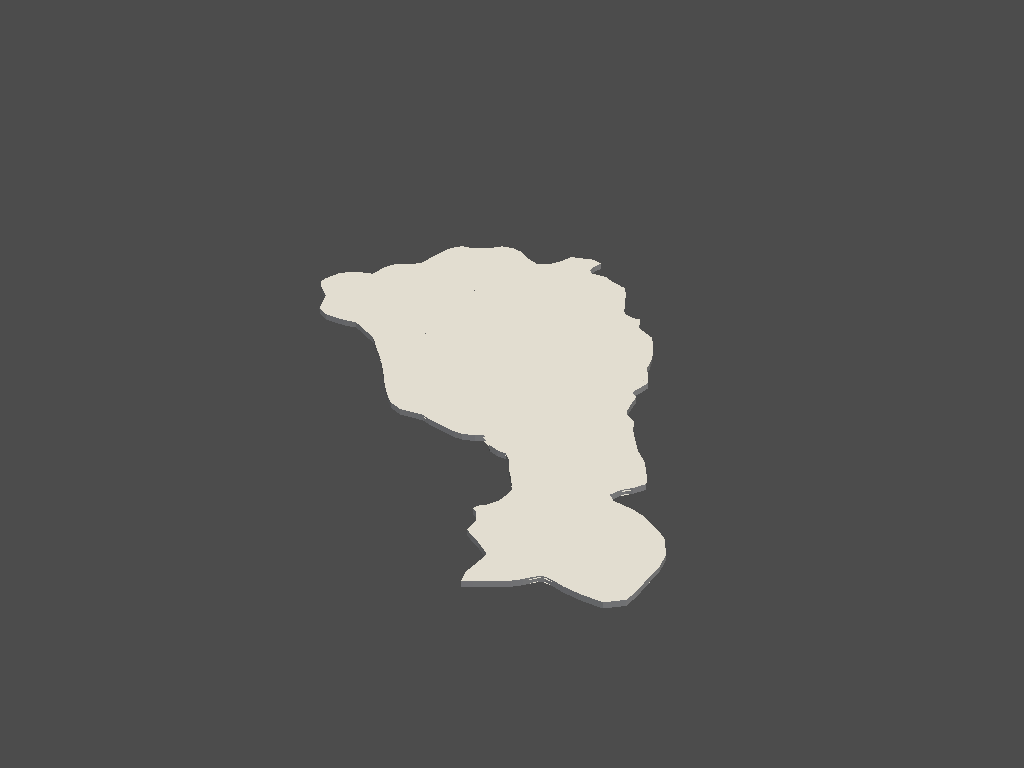

In [9]:
cellTubes = {}
for index, cell in enumerate(mfmodel.disv.cell2d.array):
    vertexIndexList = [x for x in list(cell)[4:] if x is not None]
    filterVertexIndexList = [len(vertexIndexList)] + list(range(len(vertexIndexList)))
    filterVertexIndexArray = np.array(filterVertexIndexList)
    #for lay
    layerTubes = {}
    for lay in range(nlay):
        filterVertexArray = np.array([list(verticesXYArray[vertex]) + [modelz[lay,index]] for vertex in vertexIndexList])
        cellSurf = pv.PolyData(filterVertexArray, filterVertexIndexArray)
        cellZ = modelz[:,index]
        cellMesh = cellSurf.extrude([0, 0, cellZ[lay+1]-cellZ[lay]])
        #cellMesh.save('../vtk/modelMerge_%d.vtk'%lay)
        layerTubes[str(lay)] = cellMesh  
    blocks = pv.MultiBlock(layerTubes)
    cellTubes[str(index)] = blocks.combine()
totalModelCells = pv.MultiBlock(cellTubes)
totalModelMerged = totalModelCells.combine()
totalModelMerged.plot()
totalModelMerged.save('../vtk/modelMerge.vtk')

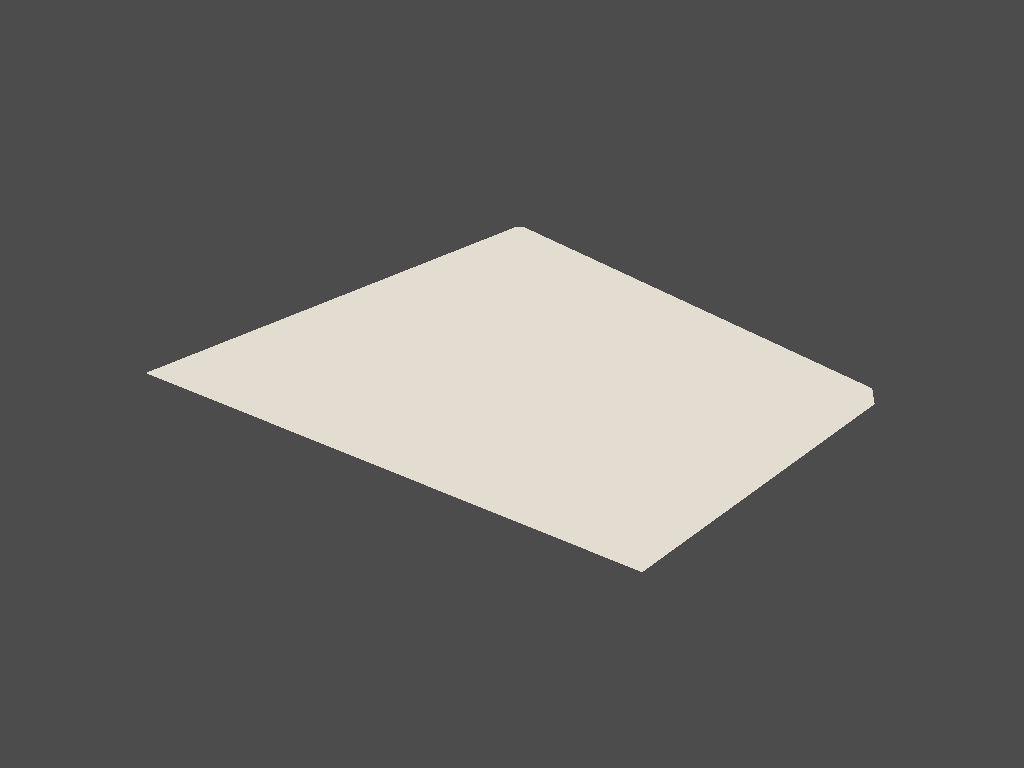

In [53]:
line1 = mfmodel.disv.cell2d.array[0]
clearList1 = [x for x in list(line1)[3:] if x is not None]
faces1 =  np.array(clearList1)
surf1 = pv.PolyData(vertices, faces1)
surf1.plot()
#mesh1 = surf1.extrude([0, 0, -mfmodel.disv.top[0]])

In [3]:
line2 = mfmodel.disv.cell2d.array[111]
clearList2 = [x for x in list(line2)[3:] if x is not None]
faces2 =  np.array(clearList2)
surf2 = pv.PolyData(vertices, faces2)
mesh2 = surf2.extrude([0, 0, -mfmodel.disv.top[0]])

In [4]:
my_tubes = {
    'tube a': mesh1,
    'tube b': mesh2,
}

blocks = pv.MultiBlock(my_tubes)
merged = blocks.combine()
merged # 

UnstructuredGrid,Information
N Cells,19
N Points,396616
X Bounds,"6.139e+05, 6.356e+05"
Y Bounds,"8.349e+06, 8.375e+06"
Z Bounds,"0.000e+00, 3.200e+02"
N Arrays,0


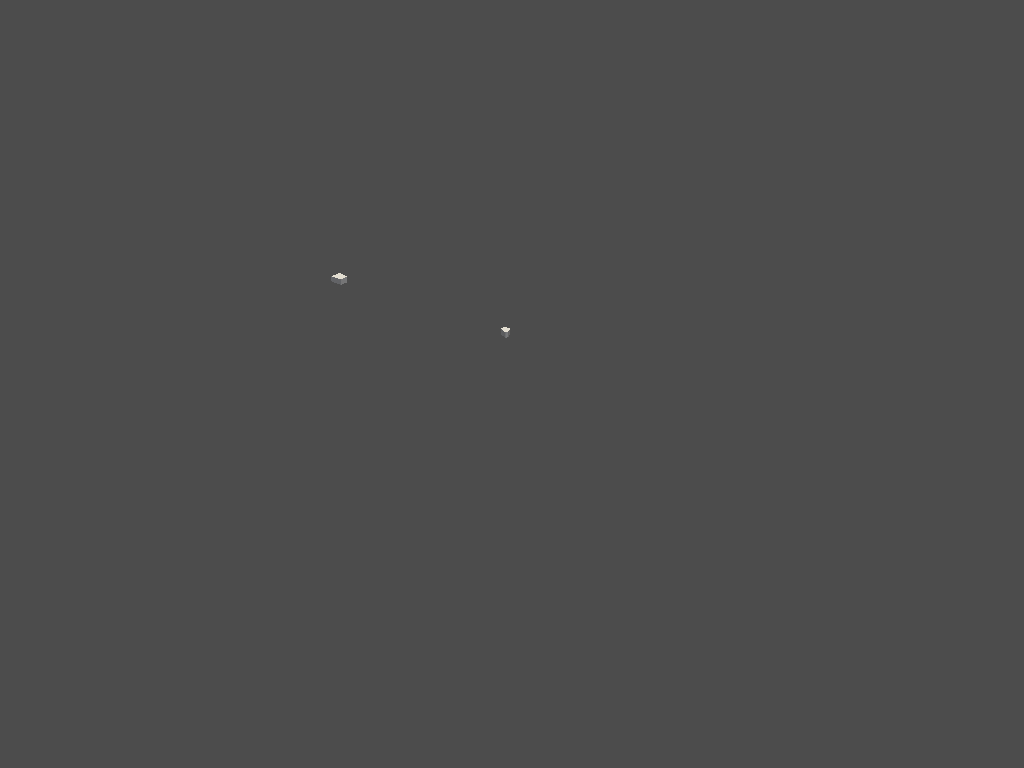

In [6]:
merged.plot()
merged.save('../vtk/modelMerge.vtk')

In [ ]:
mtop = np.ones([mfmodel.disv.nvert.array ])*mfmodel.disv.top[0]
vertices = np.dstack((mfmodel.disv.vertices.array.xv,mfmodel.disv.vertices.array.yv,mtop))[0]
faces = []
for line in mfmodel.disv.cell2d.array:
    clearList = [x for x in list(line)[3:] if x is not None]
    faces += clearList
faces = np.array(faces)

In [ ]:
surf = pv.PolyData(vertices, faces)

In [ ]:
surf.cell_arrays['head'] = head[0][0]
surf.plot()

In [ ]:
mesh = surf.extrude([0, 0, -mfmodel.disv.top[0]])

In [ ]:
-mfmodel.disv.top[:]

In [ ]:
mesh.save('../vtk/modelMesh.vtk')

In [ ]:
surf.merge?